## 42577 Introduction to Business Analytics

# **Project: Mobility with Citi Bike**

*A project by:*

* Lilja Schopka (s232027)
* Berghildur Bernódusdóttir (s232030)
* Zhila Amini (s220069)
* Ioana Popescu (s222692)

*Word count: 2132*

### To Do: 

- Write introduction

- Exploratory component: 
    - just keep one plotter function, so merge holiday plotter with plotter - done (probably)
    - make a new prediction model for weekdays and weekends
    - simplify code if possible with functions
    
- Write conclusion
- clean everything up

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#42577-Introduction-to-Business-Analytics" data-toc-modified-id="42577-Introduction-to-Business-Analytics-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>42577 Introduction to Business Analytics</a></span></li></ul></li><li><span><a href="#Project:-Mobility-with-Citi-Bike" data-toc-modified-id="Project:-Mobility-with-Citi-Bike-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Project: Mobility with Citi Bike</strong></a></span></li><li><span><a href="#Necessary-Liabraries-and-Tools" data-toc-modified-id="Necessary-Liabraries-and-Tools-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Necessary Liabraries and Tools</a></span></li><li><span><a href="#Data-Loader" data-toc-modified-id="Data-Loader-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Loader</a></span><ul class="toc-item"><li><span><a href="#data-description" data-toc-modified-id="data-description-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>data description</a></span></li><li><span><a href="#Data-prep" data-toc-modified-id="Data-prep-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data prep</a></span></li></ul></li><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data visualization</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Gender" data-toc-modified-id="Gender-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Gender</a></span></li><li><span><a href="#User-type" data-toc-modified-id="User-type-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>User type</a></span></li><li><span><a href="#bike-id" data-toc-modified-id="bike-id-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>bike id</a></span></li><li><span><a href="#birth_year" data-toc-modified-id="birth_year-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>birth_year</a></span></li><li><span><a href="#pickups" data-toc-modified-id="pickups-4.0.5"><span class="toc-item-num">4.0.5&nbsp;&nbsp;</span>pickups</a></span></li><li><span><a href="#Dropoffs" data-toc-modified-id="Dropoffs-4.0.6"><span class="toc-item-num">4.0.6&nbsp;&nbsp;</span>Dropoffs</a></span></li></ul></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#pickups-and-dropoffs-pivot-tables" data-toc-modified-id="pickups-and-dropoffs-pivot-tables-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>pickups and dropoffs pivot tables</a></span></li><li><span><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>K-Means Clustering</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Predict" data-toc-modified-id="Predict-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Predict</a></span></li></ul></li></ul></li><li><span><a href="#Prediction-Challenge" data-toc-modified-id="Prediction-Challenge-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Prediction Challenge</a></span></li><li><span><a href="#Exploratory-Component" data-toc-modified-id="Exploratory-Component-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exploratory Component</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# 1. Introduction

This report analyzes the bike-sharing data from Citi Bike (New York). Citi Bikes is one of the biggest stations-based bike-sharing system in the United States. The report mostly focuses on three components:
    
Firstly, we analyse, visualize and shortly explore the characteristics of the data. Then finally we will clean and prepare our data to make it ready to work on in later sections. This groundwork serves as a foundation for modeling the data and generates insights for further exploration.

Secondly, the Prediction Challenge involves spatially clustering the stations into 20 clusters, followed by the creation of a predictive model estimating the demand for each cluster of stations over the next 24 hours. These predictions aid in determining the required number of bicycles to allocate to each station cluster for the upcoming day.

Thirdly, the Exploratory Component delves deeper into the data's characteristics, unveiling patterns and trends. Following the analysis and completion of the Prediction Challenge, this section addresses emerging questions about the data, offering comprehensive insights into the dynamics of Citi Bike.



# 2. Data analysis and Visualization

### Necessary Liabraries and Tools

In [1]:
from DataLoader import DataLoader


%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import math


#matplotlib style options
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 4)

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 4)

### Data Loading

In [2]:
import os

current_directory = os.path.dirname(os.path.abspath('main.ipynb'))
parent_directory = os.path.dirname(current_directory)

file_path = os.path.join(parent_directory, "Trips_2018.csv")

Read the dataset from the CSV file

In [3]:
#file_path = 'Trips_subset.csv'

# read the existing subset of the data
df = DataLoader.read_data(file_path)

# save backup
backup = df.copy()
 
# Display few variables
df.head(8).T 

,0,1,2,3,4,5,6,7
Unnamed: 0,0,1,2,3,4,5,6,7
tripduration,970,723,496,306,306,1602,722,434
starttime,2018-01-01 13:50:57.4340,2018-01-01 15:33:30.1820,2018-01-01 15:39:18.3370,2018-01-01 15:40:13.3720,2018-01-01 18:14:51.5680,2018-01-01 21:31:54.1920,2018-01-02 07:54:53.6460,2018-01-02 08:06:14.3310
stoptime,2018-01-01 14:07:08.1860,2018-01-01 15:45:33.3410,2018-01-01 15:47:35.1720,2018-01-01 15:45:20.1910,2018-01-01 18:19:57.6420,2018-01-01 21:58:36.3530,2018-01-02 08:06:55.8720,2018-01-02 08:13:28.7670
start_station_id,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0
start_station_latitude,40.767272,40.767272,40.767272,40.767272,40.767272,40.767272,40.767272,40.767272
start_station_longitude,-73.993929,-73.993929,-73.993929,-73.993929,-73.993929,-73.993929,-73.993929,-73.993929
end_station_id,505.0,3255.0,525.0,447.0,3356.0,482.0,228.0,173.0
end_station_latitude,40.749013,40.750585,40.755942,40.763707,40.774667,40.739355,40.754601,40.760683
end_station_longitude,-73.988484,-73.994685,-74.002116,-73.985162,-73.984706,-73.999318,-73.971879,-73.984527


## 2.1 Data insights and Visualization 

Let's gain insights into the structure and characteristics of the data:

In [4]:
print(f"The number of the rows = {len(df)} \n")
print("Dataframe information")
df.info()

The number of the rows = 17548339 

Dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB


Let's observe wether null values are present in the Data frame


In [5]:
df.isnull().any()

Unnamed: 0                 False
tripduration               False
starttime                  False
stoptime                   False
start_station_id            True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_latitude       False
end_station_longitude      False
bikeid                     False
usertype                   False
birth_year                 False
gender                     False
dtype: bool

In [6]:
# see the number of rows with null values 
print(f"the number of null values in start_station_id column = {df['start_station_id'].isnull().sum()}, \
equals to {((df['start_station_id'].isnull().sum() / len(df)) * 100):.2f}% of the data")
      
print(f"the number of null values in end_station_id column = {df['end_station_id'].isnull().sum()}, \
equals to {((df['start_station_id'].isnull().sum() / len(df)) * 100):.2f}% of the data")

the number of null values in start_station_id column = 2497, equals to 0.01% of the data
the number of null values in end_station_id column = 2497, equals to 0.01% of the data


True indicates a null value and False indicates there is no null value. We can observe that there are 2 columns containing null values. `start_station_id` and `end_station_id` columns are missing data points, so we will replace them using mode and mean:

In [7]:
# Replace missing values
df["start_station_id"].fillna(df["start_station_id"].mode()[0], inplace = True)
df["end_station_id"].fillna(df["end_station_id"].mode()[0], inplace = True)

Let's check if it worked as anticipated:

In [8]:
df.isnull().any()

Unnamed: 0                 False
tripduration               False
starttime                  False
stoptime                   False
start_station_id           False
start_station_latitude     False
start_station_longitude    False
end_station_id             False
end_station_latitude       False
end_station_longitude      False
bikeid                     False
usertype                   False
birth_year                 False
gender                     False
dtype: bool

In [9]:
print("Data summary statistics = \n")
df.describe()

Data summary statistics = 



,Unnamed: 0,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,8.774169e+06,9.887432e+02,1.589130e+03,4.073737e+01,-7.398260e+01,1.580679e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00
std,5.065769e+06,1.889584e+04,1.439386e+03,3.225813e-02,1.912753e-02,1.438456e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01
min,0.000000e+00,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.387084e+06,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00
50%,8.774169e+06,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00
75%,1.316125e+07,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00
max,1.754834e+07,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00


### Gender distribution

Let's look at the distribution of the genders next:

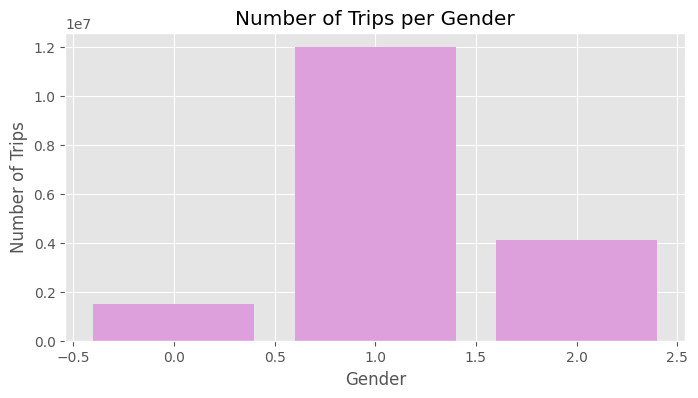

available values (classes) for the gender column = [1 0 2]
 the length data where gender=0: 1484555
 the length data where gender=1: 11971322
 the length data where gender=2: 4092462


In [10]:
""" Gender """

# Group by 'gender' and count the number of trips per gender
trips_per_gender = df.groupby('gender').size().reset_index(name='trips_per_gender')

# Plot the number of trips per gender
plt.figure(figsize=(8, 4))
plt.bar(trips_per_gender['gender'], trips_per_gender['trips_per_gender'], color='plum')
plt.title('Number of Trips per Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.show()

print(f"available values (classes) for the gender column = {df['gender'].unique()}")
print(f" the length data where gender=0: {len(df[df['gender']==0])}")
print(f" the length data where gender=1: {len(df[df['gender']==1])}")
print(f" the length data where gender=2: {len(df[df['gender']==2])}")

We can see that we have three categories; 1, 2, and 0. 1 represents men, 2 represents women and 0 are users that did not declare their gender. From the histogram we can see that most users are men. 

### User types

Next we will look at the distribution of the user types:

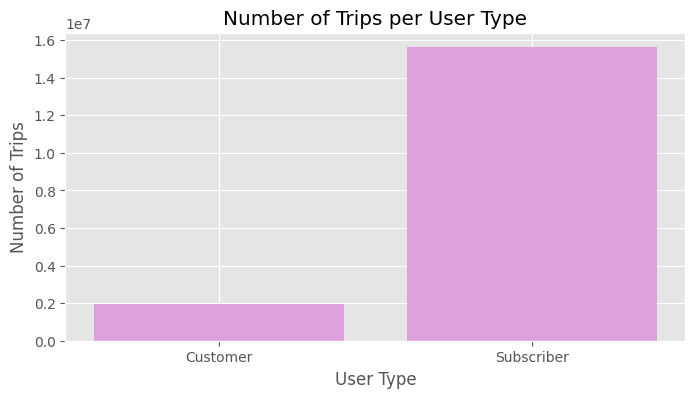

available values (classes) for the gender column = ['Subscriber' 'Customer']
 the length data where usertype=Subscriber: 15614825
 the length data where usertype=Customer: 1933514


In [11]:
""" Usertypes """

# Group by 'user_type' and count the number of trips per user type
trips_per_user_type = df.groupby('usertype').size().reset_index(name='trips_per_user_type')

# Plot the number of trips per user type
plt.figure(figsize=(8, 4))
plt.bar(trips_per_user_type['usertype'], trips_per_user_type['trips_per_user_type'], color='plum')
plt.title('Number of Trips per User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.show()


print(f"available values (classes) for the gender column = {df['usertype'].unique()}")
print(f" the length data where usertype=Subscriber: {len(df[df['usertype']=='Subscriber'])}")
print(f" the length data where usertype=Customer: {len(df[df['usertype']=='Customer'])}")

We can see that there are more subscribers than customers that use the bikes. 

### Bike analysis

Finally let's look at the number of available bikes and average trip duration:


Bike statistics:
Number of bikes used: 15244
Range of trip counts per bike: [1, 2862]
Mean: 1151.16
STD: 555.23



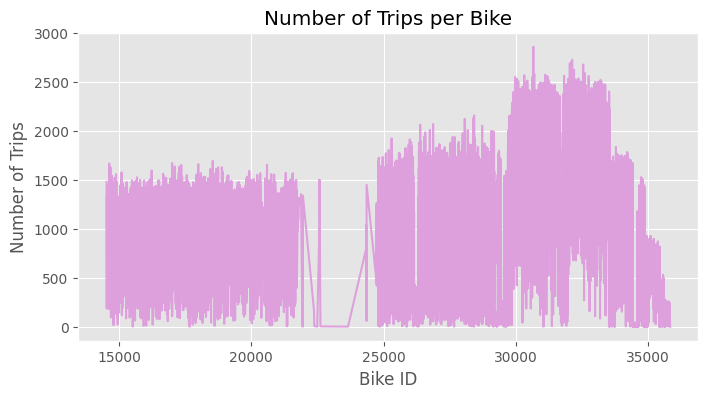

In [12]:
# Computing statistics for the bikes
bike_data = df['bikeid'].value_counts().reset_index()

print(f"""
Bike statistics:
Number of bikes used: {len(bike_data)}
Range of trip counts per bike: [{min(bike_data['count'])}, {max(bike_data['count'])}]
Mean: {bike_data['count'].mean():.2f}
STD: {bike_data['count'].std():.2f}
""")

# Top 10 most used bikes and their counts
bike_data[:10].T

# Plotting the number of trips started and ended per station
# Group by 'bikeid' and count the number of trips per bike
trips_per_bike = df.groupby('bikeid').size().reset_index(name='trip_count')

# Plot the number of trips per bike
plt.figure(figsize=(8, 4))
plt.plot(trips_per_bike['bikeid'], trips_per_bike['trip_count'], color='plum')
plt.title('Number of Trips per Bike')
plt.xlabel('Bike ID')
plt.ylabel('Number of Trips')
plt.show()

### Birth year of users

Now let's look at the distribution of birth years of users:

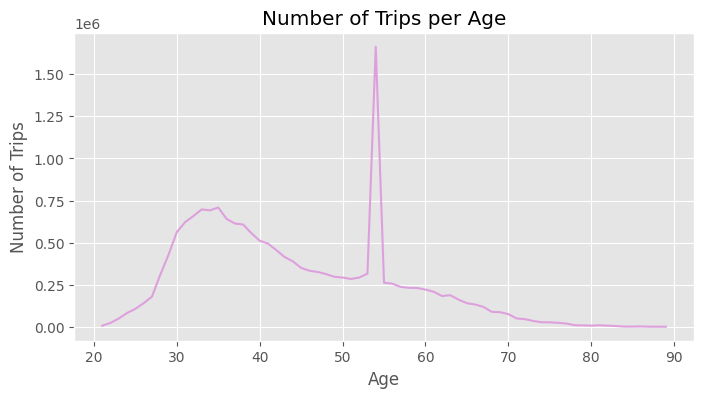

In [13]:
# Calculate age based on birth year
current_year = datetime.now().year
df['age'] = current_year - df['birth_year']

# Filter individuals younger than 90
filtered_df = df[df['age'] < 90]

# Group by 'age' and count the number of trips per age
trips_per_age = filtered_df.groupby('age').size().reset_index(name='trips_per_age')

# Plot the number of trips per age
plt.figure(figsize=(8, 4))
plt.plot(trips_per_age['age'], trips_per_age['trips_per_age'], color='plum')
plt.title('Number of Trips per Age')
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.show()

This graph shows that there are a lot of users that are aged 54. This is very peculiar. If we ignore that, we can that most users are between the ages 25 and 40. (Should we make a table of generations and number of people?)

### Correlation Visualization with heatmap

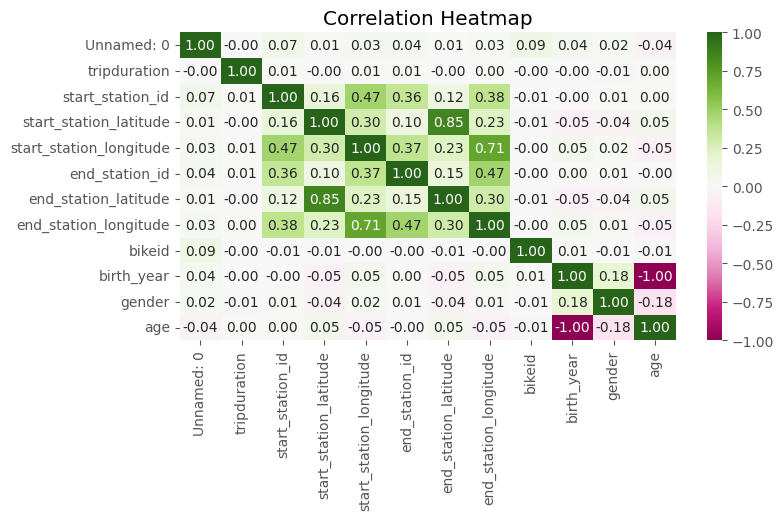

<Figure size 7000x4500 with 0 Axes>

In [14]:
# feature selection (get only numerical columns)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Heatmap')
plt.figure(figsize=(70, 45))
plt.show()

## 2.2 Data preparation and cleaning

We want to remove outliers in the duration of trips, if the trips are longer than the 99th percentile of trip durations, we will remove them. 

In [15]:
outlier_free_data = df[df.tripduration < df.tripduration.quantile(0.99)]

print(f"Number of outliers removed from dataset: {len(df) - len(outlier_free_data)}")


print(f"""
Cleaned trip duration statistics:
Trip duration range (seconds): [{min(outlier_free_data['tripduration']):.2F}, {max(outlier_free_data['tripduration']):.2F}] (the latter being {max(outlier_free_data['tripduration']) / 60 / 60 / 24:.2F} days)
Mean: {outlier_free_data['tripduration'].mean():.2F}
Median: {outlier_free_data['tripduration'].median():.2F}
STD:  {outlier_free_data['tripduration'].std():.2F}
""")

Number of outliers removed from dataset: 175529

Cleaned trip duration statistics:
Trip duration range (seconds): [61.00, 3506.00] (the latter being 0.04 days)
Mean: 776.70
Median: 599.00
STD:  576.11



Maybe add columns showing: 1-the trip time duration,  2-having the 'tripduration' column, compute the speed. (What do we want to use this for?)

In [16]:
# Convert a datetime column to datetime data type
outlier_free_data['starttime'] = pd.to_datetime(outlier_free_data['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
outlier_free_data['stoptime'] = pd.to_datetime(outlier_free_data['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")

# convert gender and usertype into category
outlier_free_data['gender'] = outlier_free_data['gender'].astype('category')
outlier_free_data['usertype'] = outlier_free_data['usertype'].astype('category')

# Convert tripduration from seconds to minutes
outlier_free_data['tripduration'] = outlier_free_data['tripduration'] / 60

# Setting the 'starttime' as index
outlier_free_data = outlier_free_data.set_index('starttime')

# Create a column named "date" out of the index 
outlier_free_data['date'] = np.array([d.date() for d in outlier_free_data.index])

# Dropping the column Unnamed
outlier_free_data = outlier_free_data.drop(['Unnamed: 0'], axis=1)

# show data
outlier_free_data.head()

C:\Users\zhila\AppData\Local\Temp\ipykernel_20960\4277228687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_free_data['starttime'] = pd.to_datetime(outlier_free_data['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
C:\Users\zhila\AppData\Local\Temp\ipykernel_20960\4277228687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_free_data['stoptime'] = pd.to_datetime(outlier_free_data['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")
C:\Users\zhila\AppData\Local\Temp\ipykernel_20960\4277228687.py:6:

,tripduration,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age,date
starttime,,,,,,,,,,,,,,
2018-01-01 13:50:57.434,16.166667,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,31,2018-01-01
2018-01-01 15:33:30.182,12.050000,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,54,2018-01-01
2018-01-01 15:39:18.337,8.266667,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,67,2018-01-01
2018-01-01 15:40:13.372,5.100000,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,49,2018-01-01
2018-01-01 18:14:51.568,5.100000,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,31,2018-01-01


# 3 Prediction challenge
## 3.1 Spatial clustering of stations

Let's start by dropping duplicate start stations and end stations and merge together all stations into one data frame. Then we will visualize the distribution, using the latitude and longitude coordinates of the stations.

In [17]:
# Assuming outlier_free_data contains station information and counts

# Extract counts for start and end stations
stations_start = outlier_free_data['start_station_id'].value_counts().reset_index()
stations_end = outlier_free_data['end_station_id'].value_counts().reset_index()

# Rename columns for clarity
stations_start.columns = ['station_id', 'count_start']
stations_end.columns = ['station_id', 'count_end']

# Extract latitude and longitude for start and end stations
coord_station_start = outlier_free_data[['start_station_id', 'start_station_latitude', 'start_station_longitude']].drop_duplicates('start_station_id')
coord_station_end = outlier_free_data[['end_station_id', 'end_station_latitude', 'end_station_longitude']].drop_duplicates('end_station_id')

# Rename columns for clarity
coord_station_start.columns = ['station_id', 'latitude_start', 'longitude_start']
coord_station_end.columns = ['station_id', 'latitude_end', 'longitude_end']

# Merge counts and coordinates for start and end stations
stations_start = stations_start.merge(coord_station_start, on='station_id', how='left')
stations_end = stations_end.merge(coord_station_end, on='station_id', how='left')

# Merge counts and coordinates for both start and end stations into a combined DataFrame
stations = stations_start.merge(stations_end, on='station_id', how='inner')

# Calculate total count for each station and drop unnecessary columns
stations['count'] = stations['count_start'] + stations['count_end']
stations.drop(['count_start', 'count_end', 'latitude_end', 'longitude_end'], axis=1, inplace=True)

# Rename columns for final output
stations.columns = ['station_id', 'latitude', 'longitude', 'count']


Text(0.5, 0, 'Latitude')

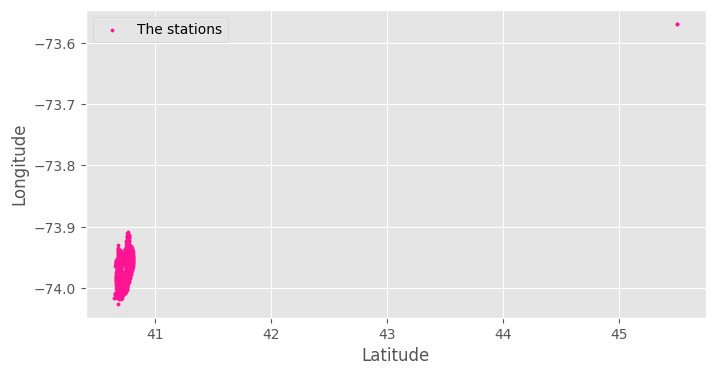

In [18]:
plt.scatter(stations.latitude, stations.longitude, label = "The stations", s=5, color='deeppink')
plt.legend(prop = {'size': 10})
plt.ylabel('Longitude')
plt.xlabel('Latitude')

On the scatter plot we can see that we have one outlier, thus an outlier both in longitude and latitude. Let's make a new scatter plot to better visualize the stations by excluding that outlier.

In [19]:
# Filter the DataFrame to exclude rows where latitude is higher than 41
stations = stations[stations['latitude'] <= 41]

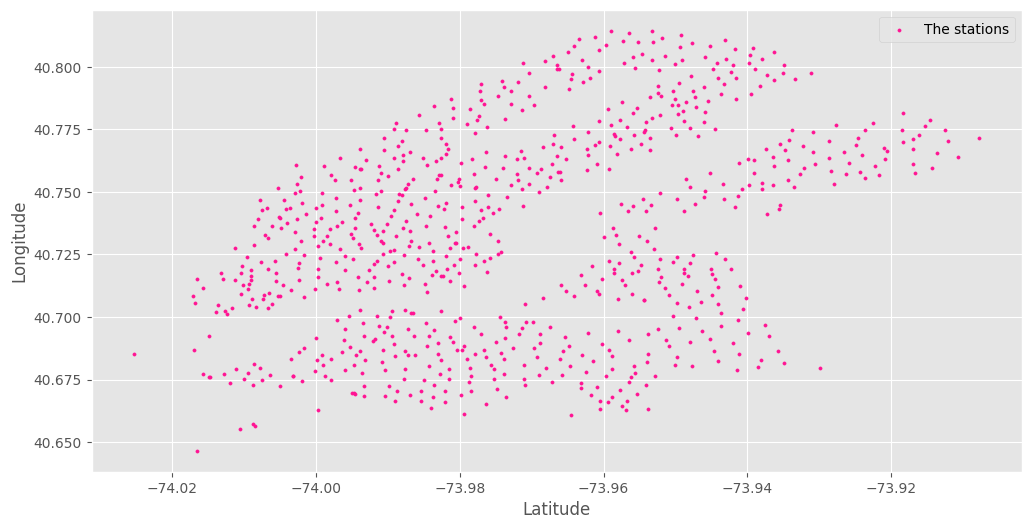

In [20]:
# Plot the scatter plot using filtered data
plt.figure(figsize=(12,6))
plt.scatter(stations.longitude, stations.latitude, label="The stations", s=5, color='deeppink')

# Add labels and legend
plt.legend(prop={'size': 10})
plt.ylabel('Longitude')
plt.xlabel('Latitude')

# Show the plot
plt.show()

Now let's do the clustering of the stations, using the stations Data Frame. Let's start with importing the package:

In [21]:
from sklearn.cluster import KMeans

In [22]:
km=KMeans(20, n_init='auto')
km.fit(stations[['latitude', 'longitude']])
stations['cluster'] = km.labels_
stations['cluster']

0       6
1       7
2       7
3       6
4       9
       ..
813    10
814     2
815     2
816     0
817     2
Name: cluster, Length: 816, dtype: int32

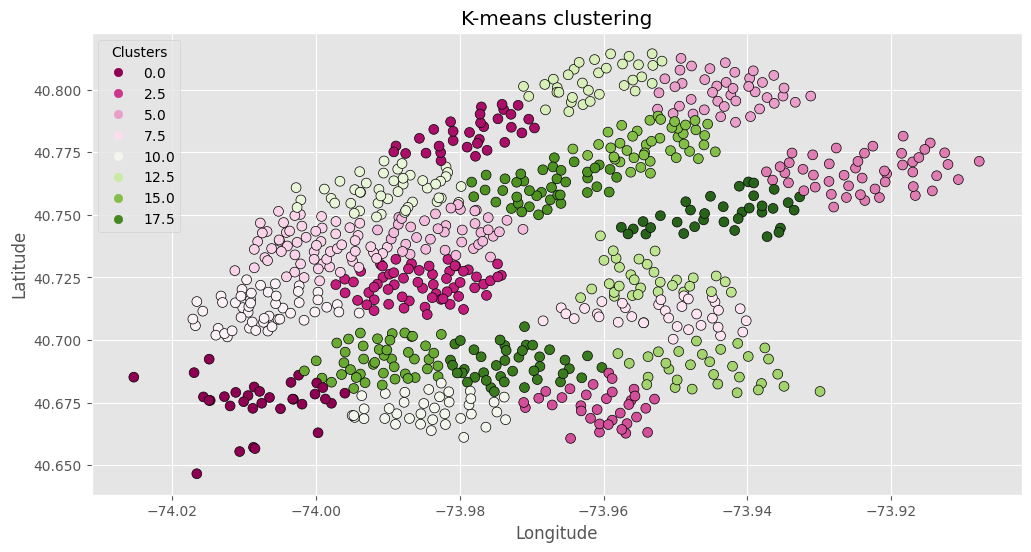

In [23]:
# Plot the clusters
plt.figure(figsize=(12, 6))
scatter = plt.scatter(stations.longitude, stations.latitude, c=stations.cluster, cmap='PiYG', edgecolors='k', s=50)

# Annotate cluster centers with cluster numbers
for i, center in enumerate(km.cluster_centers_):
    plt.annotate(f'Cluster {i}', center, textcoords="offset points", xytext=(-10, -5), ha='center', fontsize=8)

plt.title('K-means clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

Here we have a clustering of all the stations. When we started exploring how we should cluster the stations we first tried 30 clusters, but when we later calculated the R-squared scores of each cluster we found that they were not what we were hoping for. Consequently we tried fewer clusters and ended up with only 20 clusters, because we found we got the best results with that number. 

Now we will find and analyse the highest demand cluster:

In [24]:
cluster_counts = stations.groupby('cluster')['count'].sum().reset_index()
sorted_clusters = cluster_counts.sort_values('count', ascending=False)
highest_demand_cluster = sorted_clusters.iloc[0]['cluster']
print("The number of the Highest Demand Cluster: ",highest_demand_cluster)

df_high_demand_cluster = stations[stations['cluster'] == highest_demand_cluster]
print("Number of stations in Highest Demand cluster: ",len(df_high_demand_cluster))

print("The count of the Highest Demand cluster: ", sum(df_high_demand_cluster["count"]))

The number of the Highest Demand Cluster:  7
Number of stations in Highest Demand cluster:  59
The count of the Highest Demand cluster:  5617442


Now let's plot the highest demand cluster:

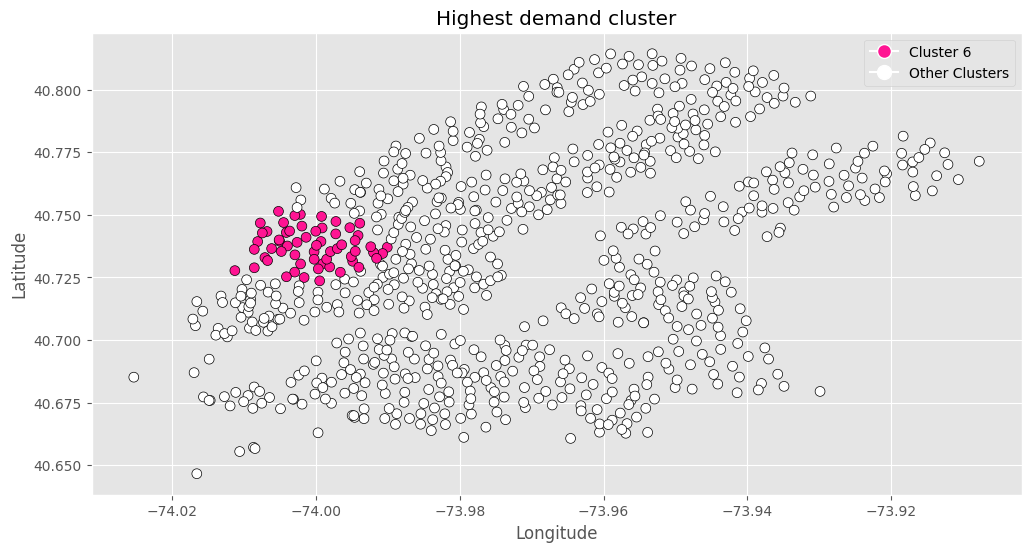

In [25]:
# Plot the clusters
plt.figure(figsize=(12, 6))

# Assign colors based on cluster
colors = np.where(stations['cluster'] == highest_demand_cluster, 'deeppink', 'white')

scatter = plt.scatter(stations.longitude, stations.latitude, c=colors, edgecolors='k', s=50)

# Annotate cluster centers with cluster numbers
for i, center in enumerate(km.cluster_centers_):
    plt.annotate(f'Cluster {i}', center, textcoords="offset points", xytext=(-10, -5), ha='center', fontsize=8)

plt.title('Highest demand cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a legend manually for custom colors
legend_labels = ['Cluster 6', 'Other Clusters']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='deeppink', markersize=10, label='Cluster 24'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='Other Clusters')]

plt.legend(handles=legend_elements, labels=legend_labels)

plt.show()

Now we can see approximately in what area the Highest volume cluster is. When we compare this to a map of New York we can see that this is in a very popular area, so it would make sense that this is the Highest volume cluster. Now it would be curious to see the lowest volume cluster. 

In [26]:
cluster_counts = stations.groupby('cluster')['count'].sum().reset_index()
sorted_clusters = cluster_counts.sort_values('count', ascending=True)
lowest_demand_cluster = sorted_clusters.iloc[0]['cluster']
print("The number of the Lowest demand Cluster: ", lowest_demand_cluster)

df_low_demand_cluster = stations[stations['cluster'] == lowest_demand_cluster]
print("Amount of stations in Lowest demand cluster: ",len(df_low_demand_cluster))

print("The count of the Lowest demand cluster: ", sum(df_low_demand_cluster["count"]))

The number of the Lowest demand Cluster:  0
Amount of stations in Lowest demand cluster:  33
The count of the Lowest demand cluster:  340918


And let's plot the lowest demand cluster as well to see approximately where it lies in New York:

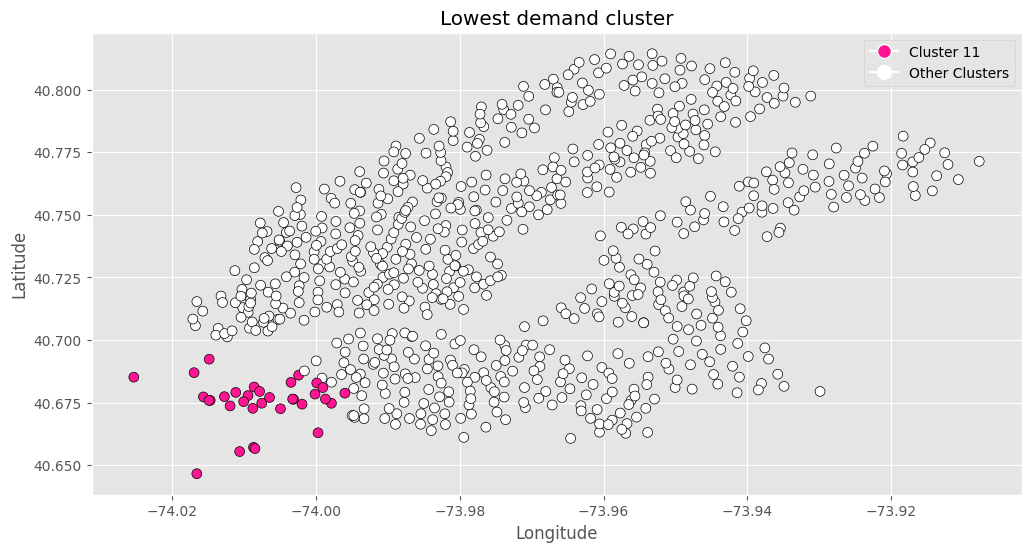

In [27]:
# Plot the clusters
plt.figure(figsize=(12, 6))

# Assign colors based on cluster
colors = np.where(stations['cluster'] == lowest_demand_cluster, 'deeppink', 'white')

scatter = plt.scatter(stations.longitude, stations.latitude, c=colors, edgecolors='k', s=50)

# Annotate cluster centers with cluster numbers
for i, center in enumerate(km.cluster_centers_):
    plt.annotate(f'Cluster {i}', center, textcoords="offset points", xytext=(-10, -5), ha='center', fontsize=8)

plt.title('Lowest demand cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a legend manually for custom colors
legend_labels = ['Cluster 11', 'Other Clusters']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='deeppink', markersize=10, label='Cluster 24'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, label='Other Clusters')]

plt.legend(handles=legend_elements, labels=legend_labels)

plt.show()

We can see that the Lowest demand cluster is at the edge of the station map, which would make sense. If we compare this to a map of New York we can see that this is approximately in a suburban area in of New York.

Finally, let's add the start cluster and end cluster of each ride to our data frame.

In [28]:
# Create a dictionary to associate station IDs with their cluster values
dict = {}
for _, row in stations.iterrows():
    dict[row['station_id']] = row['cluster']

In [29]:
outlier_free_data['start_cluster'] = outlier_free_data['start_station_id'].map(dict)
outlier_free_data['end_cluster'] = outlier_free_data['end_station_id'].map(dict)
outlier_free_data.head()

,tripduration,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age,date,start_cluster,end_cluster
starttime,,,,,,,,,,,,,,,,
2018-01-01 13:50:57.434,16.166667,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,31,2018-01-01,11.0,6.0
2018-01-01 15:33:30.182,12.050000,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,54,2018-01-01,11.0,11.0
2018-01-01 15:39:18.337,8.266667,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,67,2018-01-01,11.0,11.0
2018-01-01 15:40:13.372,5.100000,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,49,2018-01-01,11.0,11.0
2018-01-01 18:14:51.568,5.100000,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,31,2018-01-01,11.0,1.0


## 3.2 Prediction model

We want to build a prediction model for the demand of a cluster of stations over the next 24 hours, considering both arrivals (bicycle dropoffs) and departures (pickups). 

We will start by making a lagging model to use as a baseline for our prediction model. This function creates lagged features and adds them to the data frame. The function is set to create these lagged features: 

- 1 hour back
- 24 hours back
- 7 days back

The function is based on a function from week 3.

In [30]:
def buildLaggedFeatures(s, columns, lags=(4, 24*4, 4*24*7), dropna=True):
    '''
    Builds a new DataFrame to facilitate regressing over specific lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict = {}
        for c in s.columns:
            new_dict[c] = s[c]
        for col_name in columns:
            new_dict[col_name] = s[col_name]
            # create lagged Series at specified intervals
            for l in lags:
                new_dict['%s_lag%d' % (col_name, l/4)] = s[col_name].shift(l)
        res = pd.DataFrame(new_dict, index=s.index)

    elif type(s) is pd.Series:
        the_range = list(lags)
        res = pd.concat([s.shift(i) for i in the_range], axis=1)
        res.columns = ['lag_%d' % i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None

    if dropna:
        return res.dropna()
    else:
        return res

This is a function that computes the Mean squared error, the Root of the mean squared error and the R-squared error. The function is from week 4.

In [31]:
def compute_error(y_true, y_pred, nvariables = 2):
    mae = np.mean(np.abs(y_pred - y_true))
    rmse = np.sqrt(np.mean((y_pred - y_true)**2))
    r_squared = max(0, 1 - np.sum((y_true-y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    #print("")
    #print("- Mean Absolute Error = ", mae)
    #print("- R-squared = ", r_squared)
    #print("- Root Mean Squared Error = ", rmse)
    #print("_____________________________________________________")
    return r_squared

### A lagged features and regression model function

The dataframe_for_modelling function prepares the data frame for modelling.

In [32]:
def dataframe_for_modelling(df, cluster):
    # Filter the df to select rows where 'start_cluster' equals the specified 'cluster'
    filtered_data_forPickups = df[df['start_cluster'] == cluster]
    filtered_data_forDropoffs = df[df['end_cluster'] == cluster]

    # Perform groupby at a frequency of 15 minutes and count occurrences for the filtered data
    pickups = filtered_data_forPickups.groupby(pd.Grouper(freq='15T')).size().reset_index(name='pickups_num')
    dropoffs = filtered_data_forDropoffs.groupby(pd.Grouper(key='stoptime', freq='15T')).size().reset_index(name='dropoffs_num')

    pickups_and_dropoffs = pickups.merge(dropoffs.dropoffs_num, left_index=True, right_index=True, how='outer')
    pickups_and_dropoffs = pickups_and_dropoffs[:35040]
    pickups_and_dropoffs.rename(columns={'starttime': 'datetime'}, inplace=True)
    pickups_and_dropoffs.set_index('datetime', inplace=True)
    pickups_and_dropoffs = pd.DataFrame(pickups_and_dropoffs)

    return pickups_and_dropoffs

The following function creates a lagged features data frame, then splits the data frame up into training and test sets, our training set will be the period from january to october and our test set will be the period from november to december. The function then fits the data with a linear regression model. Finally, it analyses the prediction of the model and prints the statistics.

In [33]:
from sklearn.linear_model import LinearRegression

def regressionModelGenerator(df,cluster):
    pickups_and_dropoffs = dataframe_for_modelling(df, cluster)

    pickups_and_dropoffs_Lag = buildLaggedFeatures(pickups_and_dropoffs, ['pickups_num', 'dropoffs_num'])

    features_to_use_pickups = ["pickups_num_lag1", "pickups_num_lag24", "pickups_num_lag168"]
    features_to_use_dropoffs = ["dropoffs_num_lag1", "dropoffs_num_lag24", "dropoffs_num_lag168"]

    #cutoff between training and test sets: 
    trainset_end = pd.to_datetime('2018-10-31 23:45:00')
    testset_start = pd.to_datetime('2018-11-01 00:00:00')

    # train/test split
    train_data = pickups_and_dropoffs_Lag.loc[pickups_and_dropoffs_Lag.index <= trainset_end]   
    test_data = pickups_and_dropoffs_Lag.loc[pickups_and_dropoffs_Lag.index >= testset_start]


    X_p_train = train_data[features_to_use_pickups]
    X_d_train = train_data[features_to_use_dropoffs]
    y_p_train = train_data['pickups_num']
    y_d_train = train_data['dropoffs_num']

    X_p_test = test_data[features_to_use_pickups]
    X_d_test = test_data[features_to_use_dropoffs]
    y_p_test = test_data['pickups_num']
    y_d_test = test_data['dropoffs_num']
    

    model_pickups = LinearRegression()
    model_dropoffs = LinearRegression()

    model_pickups.fit(X_p_train, y_p_train)
    model_dropoffs.fit(X_d_train, y_d_train)

    # make predictions
    pickups_pred_test = model_pickups.predict(X_p_test)
    pickups_test = pd.DataFrame(y_p_test)
    pickups_test['pickups_pred_test'] = pickups_pred_test
    

    #dropoffs_pred_train = model_dropoffs.predict(X_d_train)
    dropoffs_pred_test = model_dropoffs.predict(X_d_test)
    dropoffs_test = pd.DataFrame(y_d_test)
    dropoffs_test['dropoffs_pred_test'] = dropoffs_pred_test
  

    #print("Number of cluster: ", cluster)
    #print("")
    #print("Evaluation of the model when predicting pickups:")
    rsq1 = compute_error(y_p_test, pickups_pred_test)
    
    #print("")
    #print("Evaluation of the model when predicting dropoffs:")
    rsq2 = compute_error(y_d_test, dropoffs_pred_test)
    

    return rsq1, rsq2, pickups_and_dropoffs, pickups_test, dropoffs_test
    

In [34]:
Rsquared1 = {} #dictionary for R-squared scores for pickups predictions
Rsquared2 = {} #dictionary for R-squared scores for dropoffs predictions

pickups_test_highest_demand = pd.DataFrame()
pickups_test_lowest_demand = pd.DataFrame()

dropoffs_test_highest_demand = pd.DataFrame()
dropoffs_test_lowest_demand = pd.DataFrame()

for i in range(0,20):
    rsq1, rsq2, pickups_and_dropoffs, pickups_test, dropoffs_test = regressionModelGenerator(outlier_free_data, i)
    Rsquared1[i] = rsq1
    Rsquared2[i] = rsq2 
    if i == highest_demand_cluster:  
        pickups_test_highest_demand = pickups_test
        dropoffs_test_highest_demand = dropoffs_test
    if i == lowest_demand_cluster:
        pickups_test_lowest_demand = pickups_test
        dropoffs_test_lowest_demand = dropoffs_test

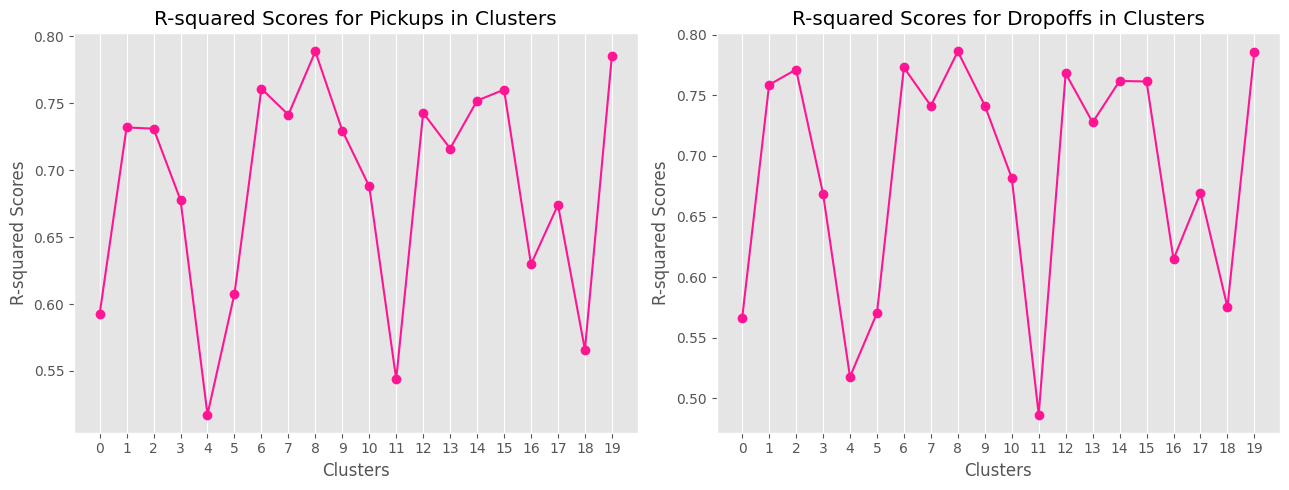

In [ ]:
# Extracting cluster numbers and R-squared scores from the dictionary
clusters = list(Rsquared1.keys())
r_squared_values1 = list(Rsquared1.values())
r_squared_values2 = list(Rsquared2.values())

plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1) 
plt.plot(clusters, r_squared_values1, marker='o', linestyle='-', color='deeppink')
plt.xlabel('Clusters')
plt.ylabel('R-squared Scores')
plt.title('R-squared Scores for Pickups in Clusters')
plt.xticks(clusters)  # Set x-axis ticks to cluster numbers
plt.grid(axis='y')  

plt.subplot(1, 2, 2)
plt.plot(clusters, r_squared_values2, marker='o', linestyle='-', color='deeppink')
plt.xlabel('Clusters')
plt.ylabel('R-squared Scores')
plt.title('R-squared Scores for Dropoffs in Clusters')
plt.xticks(clusters)  # Set x-axis ticks to cluster numbers
plt.grid(axis='y')  

plt.tight_layout()
plt.show()

The plotted graph represents the R-squared scores associated with the different clusters. We know that cluster 9 is the Highest demand cluster and cluster 14 is the Lowest demand cluster. The Highest demand cluster has the most pickups and dropoffs and therefore the most data to train on. Consequently, this cluster records the highest R-squared score, aligning with the expectation that abundant training data enhances model performance. The same applies to the Lowest demand cluster, because that cluster has the least data to train on, that cluster has a low R-squared score. This observation substantiates the understanding that limited training data often results in lower model accuracy.

After seeing the R-squared results, we wanted to explore the possibility of getting even better results if we would standardize our data. This exploration resulted however with the same results, so we ended up not standardizing the data.


Now we want to visualize the prediction for the highest and lowest demand clusters:

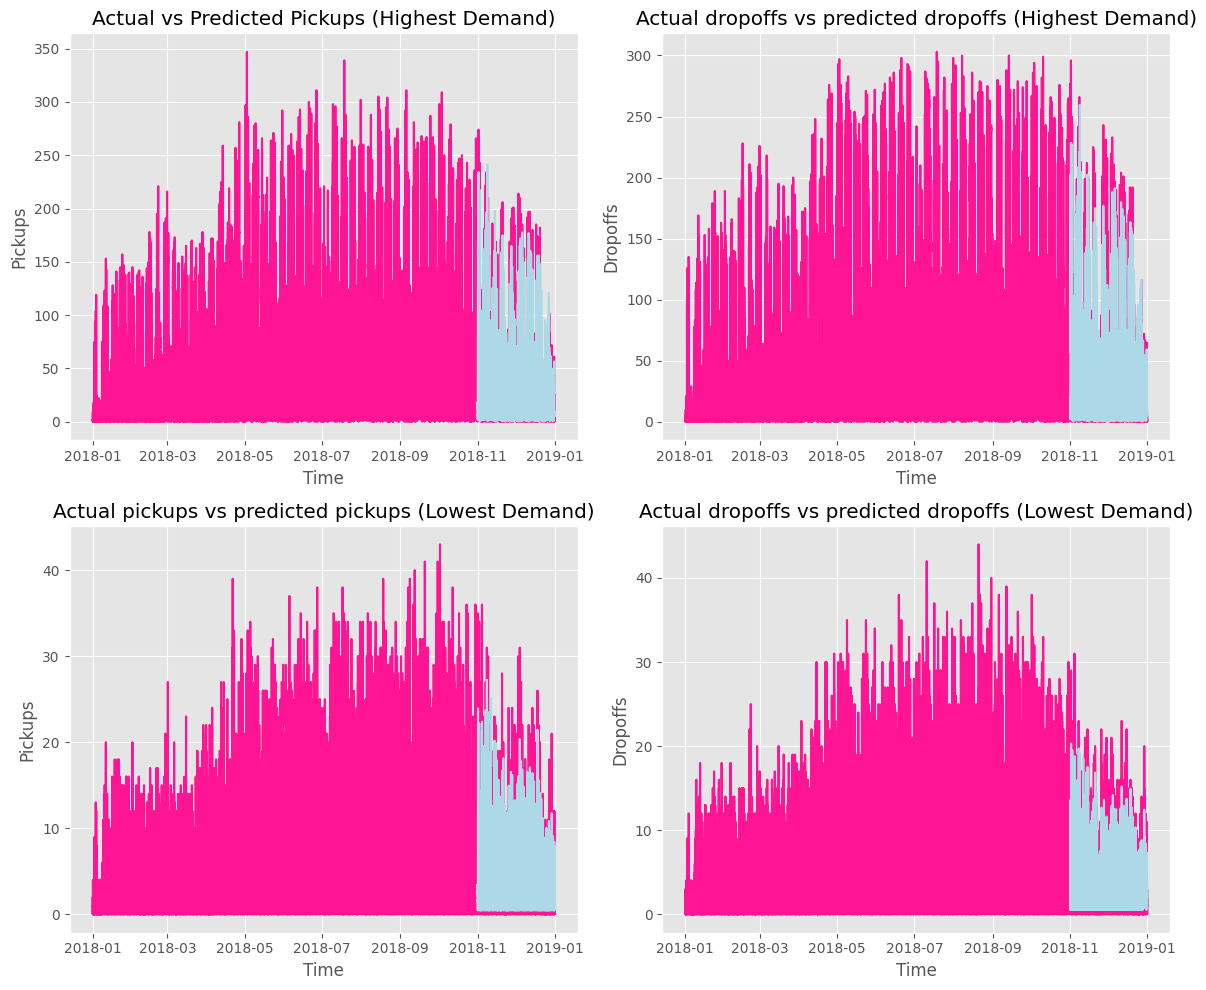

In [83]:
rsq1, rsq2, pickups_and_dropoffs, pickups_test, dropoffs_test = regressionModelGenerator(outlier_free_data, highest_demand_cluster)
p_and_d_highest_demand = pickups_and_dropoffs


fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Subplot 1 - Actual pickups vs predicted pickups in highest demand cluster
axs[0, 0].plot(p_and_d_highest_demand.index, p_and_d_highest_demand['pickups_num'], color='deeppink')
axs[0, 0].plot(pickups_test_highest_demand.index, pickups_test_highest_demand['pickups_pred_test'], color='lightblue')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Pickups')
axs[0, 0].set_title('Actual vs Predicted Pickups (Highest Demand)')
axs[0, 0].legend_labels = ['Predicted values', 'Actual values']
#axs[0, 0].legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='deeppink', markersize=10, label='Actual values'),
#                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label='Predicted values')]
#axs[0, 0].plt.legend(handles=legend_elements, labels=legend_labels)

# Subplot 2 - Actual dropoffs vs predicted dropoffs in highest demand cluster
axs[0, 1].plot(p_and_d_highest_demand.index, p_and_d_highest_demand['dropoffs_num'], color='deeppink')
axs[0, 1].plot(dropoffs_test_highest_demand.index, dropoffs_test_highest_demand['dropoffs_pred_test'], color='lightblue')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Dropoffs')
axs[0, 1].set_title('Actual dropoffs vs predicted dropoffs (Highest Demand)')

rsq1, rsq2, pickups_and_dropoffs, pickups_test, dropoffs_test = regressionModelGenerator(outlier_free_data, lowest_demand_cluster)
p_and_d_lowest_demand = pickups_and_dropoffs

# Subplot 3 - Actual pickups vs predicted pickups in lowest demand cluster
axs[1, 0].plot(p_and_d_lowest_demand.index, p_and_d_lowest_demand['pickups_num'], color='deeppink')
axs[1, 0].plot(pickups_test_lowest_demand.index, pickups_test_lowest_demand['pickups_pred_test'], color='lightblue')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Pickups')
axs[1, 0].set_title('Actual pickups vs predicted pickups (Lowest Demand)')

# Subplot 4 - Actual dropoffs vs predicted dropoffs in lowest demand cluster
axs[1, 1].plot(p_and_d_lowest_demand.index, p_and_d_lowest_demand['dropoffs_num'], color='deeppink')
axs[1, 1].plot(dropoffs_test_lowest_demand.index, dropoffs_test_lowest_demand['dropoffs_pred_test'], color='lightblue')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Dropoffs')
axs[1, 1].set_title('Actual dropoffs vs predicted dropoffs (Lowest Demand)')

plt.tight_layout()
plt.show()

## 3.2 Overnight Prediction

In this part of the report, we calculate the daily bike requirements for each cluster based on the results generated by our prediction model. The model outputs the count of pickups and dropoffs for each quarter of the day. To extract the necessary bike demand information from the prediction results, we have defined a function called "pred_demands," outlined as follows:

In [35]:
#delete:
def pred_demands (pickups_pred, dropoffs_pred, pickups, dropoffs, date):

    # Convert the date string to a datetime object
    target_date = pd.to_datetime(date)

    # create dataframes out of the prediction outputs
        # true values
    pickups_true = pickups.to_frame() 
    dropoffs_true = dropoffs.to_frame() 

        # pred values
    pickups_pred = pd.DataFrame({'pickups_num': pickups_pred})
    pickups_pred.index = pickups_true.index
    dropoffs_pred = pd.DataFrame({'dropoffs_num': dropoffs_pred})
    dropoffs_pred.index = dropoffs_true.index

    # Merge pickups_pred and dropoffs_pred on their index
    predictions = pickups_pred.merge(dropoffs_pred, left_index=True, right_index=True, how='outer')
    true_values = pickups_true.merge(dropoffs_true, left_index=True, right_index=True, how='outer')

    # Filter the DataFrame for the target date
    target_date_data_pred = predictions[predictions.index.date == pd.to_datetime(target_date).date()]
    target_date_data = true_values[true_values.index.date == pd.to_datetime(target_date).date()]

    # calculate the demand for bike for each quarter of the day
    target_date_data_pred['bike_demand'] = abs(target_date_data_pred['dropoffs_num'] - target_date_data_pred['pickups_num'])
    target_date_data['bike_demand'] = abs(target_date_data['dropoffs_num'] - target_date_data['pickups_num'])

    # get total demand for the day
    total_demand_pred = target_date_data_pred['bike_demand'].sum()
    total_demand = target_date_data['bike_demand'].sum()
    
    return math.ceil(total_demand_pred), math.ceil(total_demand)

In [36]:
def pred_demands (pickups_pred, dropoffs_pred, pickups_and_dropoffs, date):

    # Convert the date string to a datetime object
    target_date = pd.to_datetime(date)

    # Merge pickups_pred and dropoffs_pred on their index
    predictions = pickups_pred.merge(dropoffs_pred, left_index=True, right_index=True, how='outer')
    true_values = pickups_and_dropoffs

    # Filter the DataFrame for the target date
    target_date_data_pred = predictions[predictions.index.date == pd.to_datetime(target_date).date()]
    target_date_data = true_values[true_values.index.date == pd.to_datetime(target_date).date()]

    # calculate the demand for bike for each quarter of the day
    target_date_data_pred['bike_demand'] = abs(target_date_data_pred['dropoffs_pred_test'] - target_date_data_pred['pickups_pred_test'])
    target_date_data['bike_demand'] = abs(target_date_data['dropoffs_num'] - target_date_data['pickups_num'])

    # get total demand for the day
    total_demand_pred = target_date_data_pred['bike_demand'].sum()
    total_demand = target_date_data['bike_demand'].sum()
    
    return math.ceil(total_demand_pred), math.ceil(total_demand)

Let's use the function above, to make a predition for a random day:

In [37]:
# determine the date
date='2018-11-01'

# Initialize an empty dictionary to store demand per cluster
required_bike_pred = {}
required_bike = {}

for i in range(0, 20):
    # Get the predictions for the cluster
    pickups_err, dropoffs_err, pickups_and_dropoffs, pickups_pred, dropoffs_pred = regressionModelGenerator(outlier_free_data, i)
    
    # Get the number of required bikes
    demand_pred, demand = pred_demands(pickups_pred, dropoffs_pred, pickups_and_dropoffs, date)

    # Add to the dictionary with the cluster index as the key
    required_bike_pred[i] = demand_pred
    required_bike[i] = demand

C:\Users\zhila\AppData\Local\Temp\ipykernel_20960\1519164525.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_date_data_pred['bike_demand'] = abs(target_date_data_pred['dropoffs_pred_test'] - target_date_data_pred['pickups_pred_test'])
C:\Users\zhila\AppData\Local\Temp\ipykernel_20960\1519164525.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_date_data['bike_demand'] = abs(target_date_data['dropoffs_num'] - target_date_data['pickups_num'])
C:\Users\zhila\AppData\Local\Temp\ipykernel_2

In [79]:
# Summing up the demands for a day
total_demand_for_day = sum(required_bike.values())
print(f"Total demand for bikes on {date}: {total_demand_for_day}")

Total demand for bikes on 2018-11-01: 21213


Visualizing the demand for bikes in different clusters can provide valuable insights! Let's take a look at what we have:

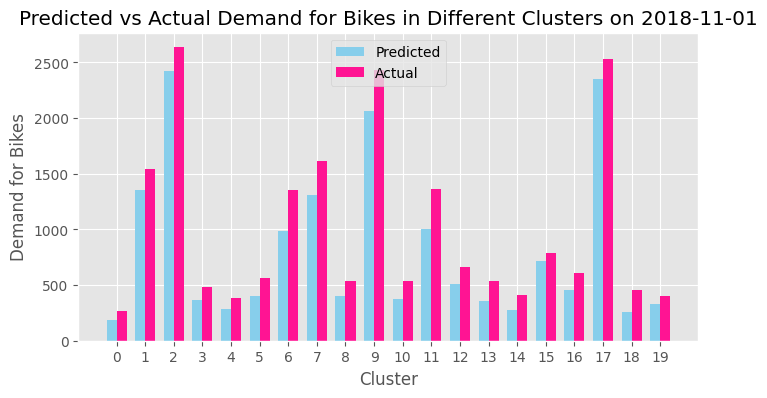

In [54]:
clusters = list(required_bike.keys())
predicted_demands = list(required_bike_pred.values())
actual_demands = list(required_bike.values())

# Set up the bar positions
bar_width = 0.35
index = np.arange(len(clusters))

# Plot the bars
plt.bar(index, predicted_demands, width=bar_width, label='Predicted', color='skyblue')
plt.bar(index + bar_width, actual_demands, width=bar_width, label='Actual', color='deeppink')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Demand for Bikes')
plt.title(f'Predicted vs Actual Demand for Bikes in Different Clusters on {date}')

# Add x-axis ticks and labels
plt.xticks(index + bar_width / 2, clusters)

# Add legend
plt.legend()

# Show the plot
plt.show()

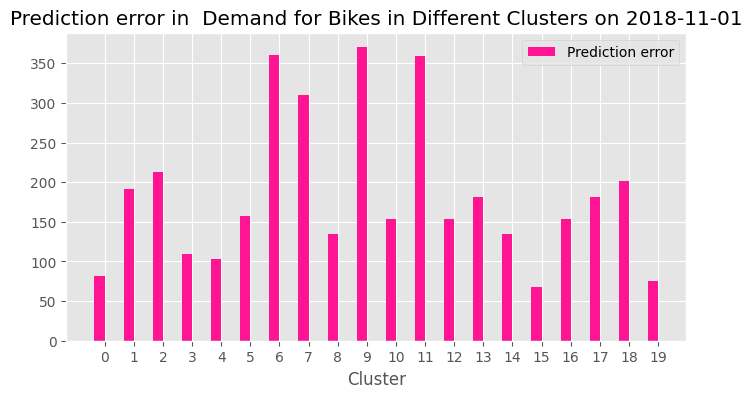

In [53]:
# Calculate the differences
differences = [a - b for a, b in zip(actual_demands, predicted_demands)]

# Set up the bar positions
bar_width = 0.35
index = np.arange(len(clusters))

# Plot the bars
plt.bar(index, differences, width=bar_width, label='Prediction error', color='deeppink')

# Add labels and title
plt.xlabel('Cluster')
plt.title(f'Prediction Error in  Demand for Bikes in Different Clusters on {date}')

# Add x-axis ticks and labels
plt.xticks(index + bar_width / 2, clusters)

# Add legend
plt.legend()

# Show the plot
plt.show()

# 4 Exploratory Component

RESEARCH QUESTION:
- Are the trips shorter/fewer in the winter compared to summer? And when are there more guest users renting bikes?
- Are the trips different when there's a public holiday compared to when there isn't a holiday?

Extra points: 
- calculate bikes needed for christmas eve and new years eve, since rentals are high those days

Here, we go back to the daily pickup and dropoffs plots. We need to split the data into weekdays and weekends and take a look at the pattern. In order to do so, let's add a column weedend to our dataset:

In [109]:
# deep copy of the dataframe
df2 = outlier_free_data.copy()

In [110]:
# Create a new column 'weekend'
df2['weekend'] = df2.index.dayofweek // 5 == 1

# Split the dataframe into weekdays and weekends
df_weekdays = df2[df2['weekend'] == False]
df_weekends = df2[df2['weekend'] == True]

These functions will make our life much easier:

In [111]:
def group_by(df):
    # Group by 15-minute intervals and count the number of trips in each interval
    pickups = df.groupby(pd.Grouper(freq='15T')).size().reset_index(name='pickups_num')
    dropoffs= df.groupby(pd.Grouper(key='stoptime', freq='15T')).size().reset_index(name='dropoffs_num')
    return pickups, dropoffs

In [112]:
def pivot_table(pickups, dropoffs):
    
    pickups['date'] = pickups['starttime'].dt.date
    pickups['time'] = pickups['starttime'].dt.time
    pickups_pivot = pickups.pivot_table(index='date', columns='time', values='pickups_num', fill_value='NaN')

    dropoffs['date'] = dropoffs['stoptime'].dt.date
    dropoffs['time'] = dropoffs['stoptime'].dt.time
    dropoffs_pivot = dropoffs.pivot_table(index='date', columns='time', values='dropoffs_num', fill_value='NaN')
    return pickups_pivot, dropoffs_pivot

Now, let's make the pickup/dropoff pivot tables one more time with these new dataframes:

In [114]:
pickups_weekdays, dropoffs_weekdays = group_by(df_weekdays)
pickups_weekends, dropoffs_weekends = group_by(df_weekends)

pickups_weekdays_pivot, dropoffs_weekdays_pivot = pivot_table(pickups_weekdays, dropoffs_weekdays)
pickups_weekend_pivot, dropoffs_weekends_pivot = pivot_table(pickups_weekends, dropoffs_weekends)

A combined function of plotter and holiday plotter:

In [115]:
def plotter (pivot_table, label='pickups', holiday = False):

    # Transpose the pivot_table to have time as rows and dates as columns
    pivot_table_T = pivot_table.T
    # Convert date columns to strings
    pivot_table_T.index = pivot_table_T.index.astype(str)
    # Convert all columns to numeric
    pivot_table_T = pivot_table_T.apply(pd.to_numeric, errors='coerce')

    if holiday:
        colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(pivot_table_T.columns)))

        for i, (date, color) in enumerate(zip(pivot_table_T.columns, colors)):
            plt.plot(pivot_table_T.index,
                    pivot_table_T[date],
                    label=str(date),
                    color=color)
        
        legend_labels = [nyc_holidays_2018.get(str(date), str(date)) for date in pivot_table_T.columns]
        plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1.1, 1))
    else:
        # Plot each day as a separate line
        plt.figure(figsize=(8, 4))
        for date in pivot_table_T.columns:
            plt.plot(pivot_table_T.index, 
                    pivot_table_T[date], 
                    label=str(date))
            
    # Generate the average pickups at each time
    average = pivot_table_T.mean(axis=1)
    plt.axhline(y=average.mean(), color='k', linewidth=3, linestyle='--', label='Average')


    # Customize the plot
    plt.title(label +' Over Time for Each Day')
    plt.xlabel('Time')
    plt.ylabel(label)
    plt.xticks(rotation=45)

    # Set the x-axis tick positions (showing every 4th label for example)
    tick_positions = np.arange(0, len(pivot_table_T.index), 4)
    plt.xticks(tick_positions, pivot_table_T.index[tick_positions], rotation=45)
    
    plt.show()

Using the plotter function, we plot both weekdays and weekends pickups and dropoffs: 

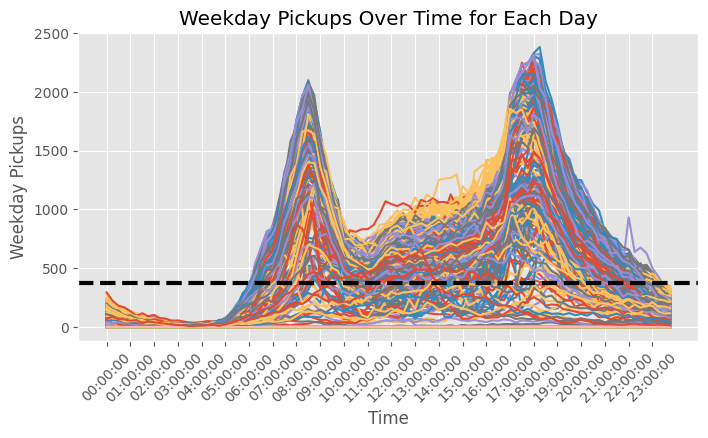

In [116]:
plotter(pickups_weekdays_pivot, label='Weekday Pickups')

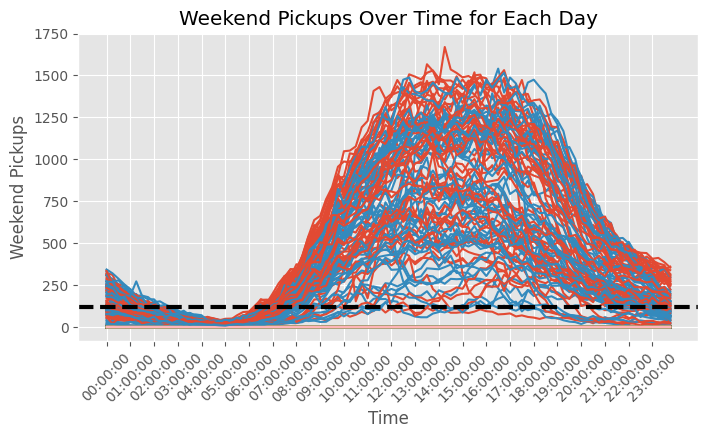

In [117]:
plotter(pickups_weekends_pivot, label='Weekend Pickups')

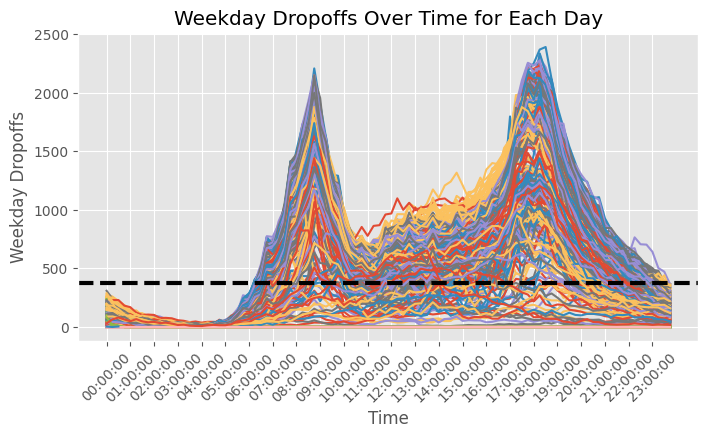

In [118]:
plotter(dropoffs_weekdays_pivot, label='Weekday Dropoffs')

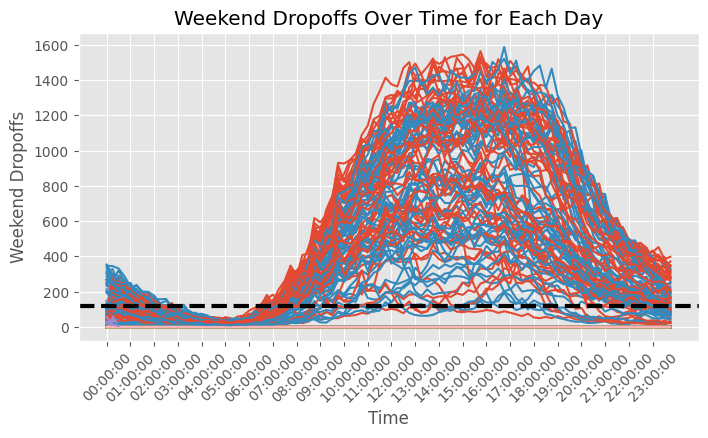

In [119]:
plotter(dropoffs_weekends_pivot, label='Weekend Dropoffs')

As it can be seen in the figures above, the patterns for weekdays and weekends are clearly different. 

During the weekdays (Monday to Friday) there is a morning Peak (Around 7 am) that shows the morning rush hour when people are commuting to work or school, resulting in a peak in both dropoffs and pickups. Moreover, there is an afternoon Peak (Around 5 pm) that corresponds to the evening rush hour when people are returning home from work or school, causing another peak.

On the other hand, on the weekends (Saturday and Sunday), a single Peak (Around 3 pm) can be seen in the early to mid-afternoon (around 3 pm). This suggests a different pattern than weekdays, possibly indicating that people start their activities later in the day.

From this analysis, two points of interest raises: 
1- These patterns can be valuable for predicting demand based on time and day.
2- It would also be interesting to see any deviations from these patterns, as they may be influenced by external factors, events, or changes in societal behavior.

In [66]:
# Separate data into holidays and non-holidays
df_holidays = df2[df2['is_holiday'] == 1]
df_nonholidays = df2[df2['is_holiday'] == 0]

# Group by 15-minute intervals and count the number of trips in each interval
#holidays
pickups_holidays = df_holidays.groupby(pd.Grouper(freq='15T')).size().reset_index(name='pickups_num')
dropoffs_holidays = df_holidays.groupby(pd.Grouper(key='stoptime', freq='15T')).size().reset_index(name='dropoffs_num')
#non-holidays
pickups_nonholidays = df_nonholidays.groupby(pd.Grouper(freq='15T')).size().reset_index(name='pickups_num')
dropoffs_nonholidays = df_nonholidays.groupby(pd.Grouper(key='stoptime', freq='15T')).size().reset_index(name='dropoffs_num')

# Create a pivot table for pickups
#holidays
pickups_holidays['date'] = pickups_holidays['starttime'].dt.date
pickups_holidays['time'] = pickups_holidays['starttime'].dt.time
pickups_holidays_pivot = pickups_holidays.pivot_table(index='date', columns='time', values='pickups_num', fill_value='NaN')
pickups_holidays_pivot = pickups_holidays_pivot.loc[(pickups_holidays_pivot != 0).any(axis=1)]


#non-holidays
pickups_nonholidays['date'] = pickups_nonholidays['starttime'].dt.date
pickups_nonholidays['time'] = pickups_nonholidays['starttime'].dt.time
pickups_nonholidays_pivot = pickups_nonholidays.pivot_table(index='date', columns='time', values='pickups_num', fill_value='NaN')
pickups_nonholidays_pivot = pickups_nonholidays_pivot.loc[(pickups_nonholidays_pivot != 0).any(axis=1)]


# Create a pivot table for dropoffs
#holidays
dropoffs_holidays['date'] = dropoffs_holidays['stoptime'].dt.date
dropoffs_holidays['time'] = dropoffs_holidays['stoptime'].dt.time
dropoffs_holidays_pivot = dropoffs_holidays.pivot_table(index='date', columns='time', values='dropoffs_num', fill_value='NaN')
dropoffs_holidays_pivot = dropoffs_holidays_pivot.loc[(dropoffs_holidays_pivot != 0).any(axis=1)]

#non-holidays
dropoffs_nonholidays['date'] = dropoffs_nonholidays['stoptime'].dt.date
dropoffs_nonholidays['time'] = dropoffs_nonholidays['stoptime'].dt.time
dropoffs_nonholidays_pivot = dropoffs_nonholidays.pivot_table(index='date', columns='time', values='dropoffs_num', fill_value='NaN')


KeyError: 'is_holiday'

In [53]:
#delete:
def plotter_holiday(pivot_table, label='pickups', legend=True):

    # Transpose the pivot_table to have time as rows and dates as columns
    pivot_table_T = pivot_table.T
    # Convert date columns to strings
    pivot_table_T.index = pivot_table_T.index.astype(str)
    # Convert all columns to numeric
    pivot_table_T = pivot_table_T.apply(pd.to_numeric, errors='coerce')

    # Plot each day as a separate line
    #plt.figure(figsize=(8, 4))
    #for date in pivot_table_T.columns:
       # plt.plot(pivot_table_T.index, 
        #        pivot_table_T[date], 
         #       label=str(date))
        
    colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(pivot_table_T.columns)))

    for i, (date, color) in enumerate(zip(pivot_table_T.columns, colors)):
        plt.plot(pivot_table_T.index,
                 pivot_table_T[date],
                 label=str(date),
                 color=color)    
        
    # Generate the average pickups at each time
    average = pivot_table_T.mean(axis=1)
    plt.axhline(y=average.mean(), color='k', linewidth=3, linestyle='--', label='Average')


    # Customize the plot
    plt.title(label +' Over Time for Each Day')
    plt.xlabel('Time')
    plt.ylabel(label)
    plt.xticks(rotation=45)

    # Set the x-axis tick positions (showing every 4th label for example)
    tick_positions = np.arange(0, len(pivot_table_T.index), 4)
    plt.xticks(tick_positions, pivot_table_T.index[tick_positions], rotation=45)
        
        
    if legend:
        legend_labels = [nyc_holidays_2018.get(str(date), str(date)) for date in pivot_table_T.columns]
        plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1.1, 1))
     
    plt.show()

In [ ]:
plotter(pickups_nonholidays_pivot, label='Non-Holidays Pickups')

In [ ]:
plotter(pickups_holidays_pivot, label='Holidays Pickups', holiday=True)


It's noteworthy that on Independence Day, there is a peak in the number of rented bikes around 22:00, coinciding with various nighttime events and celebrations. As anticipated, during most holidays, there is a noticeable absence of bike rentals during typical rush hours. Additionally, as temperatures begin to rise, there is a discernible upward trend in the number of rented bikes throughout the day. This observation aligns with the increased outdoor activities and heightened demand for bikes.

It is interesting to explore whether the absence of a peak during rush hours on holidays is primarily influenced by weekends rather than the holiday itself. By understanding whether the holidays fall on weekdays or weekends, it can be discerned whether the observed pattern is a result of typical weekend activity or a distinctive characteristic of the holiday.

In [ ]:
df_holidays_weekends = df2[(df2['is_holiday'] == 1) & (df2['weekend'] == True)]


# Group by 15-minute intervals and count the number of trips in each interval
#holidays
pickups_holidays_weekends = df_holidays_weekends.groupby(pd.Grouper(key='starttime', freq='15T')).size().reset_index(name='pickups_num')


# Create a pivot table for pickups
#holidays
pickups_holidays_weekends['date'] = pickups_holidays_weekends['starttime'].dt.date
pickups_holidays_weekends['time'] = pickups_holidays_weekends['starttime'].dt.time
pickups_holidays_weekends_pivot = pickups_holidays_weekends.pivot_table(index='date', columns='time', values='pickups_num', fill_value='NaN')
pickups_holidays_weekends_pivot = pickups_holidays_weekends_pivot.loc[(pickups_holidays_pivot != 0).any(axis=1)] 

In [ ]:
plotter_holiday(pickups_holidays_weekends_pivot, label='Holidays Pickups during Weekend', legend=True) 

As it can be noticed from the graph above, only one holiday falls on the weekend. Consequently, the absence of peaks during rush hours can be attributed to the characteristics of the holiday itself rather than the influence of the weekend.

In [ ]:
df_winter = df2[df2['season'] == 'Winter']
df_spring = df2[df2['season'] == 'Spring']
df_summer = df2[df2['season'] == 'Summer']
df_autumn = df2[df2['season'] == 'Autumn']

# Group by 15-minute intervals and count the number of trips in each interval
# pickups
pickups_winter = df_winter.groupby(pd.Grouper(freq='15T')).size().reset_index(name='pickups_num')
pickups_spring = df_spring.groupby(pd.Grouper(freq='15T')).size().reset_index(name='pickups_num')
pickups_summer = df_summer.groupby(pd.Grouper(freq='15T')).size().reset_index(name='pickups_num')
pickups_autumn = df_autumn.groupby(pd.Grouper(freq='15T')).size().reset_index(name='pickups_num')

# dropoffs
dropoffs_winter = df_winter.groupby(pd.Grouper(freq='15T')).size().reset_index(name='dropoffs_num')
dropoffs_spring = df_spring.groupby(pd.Grouper(freq='15T')).size().reset_index(name='dropoffs_num')
dropoffs_summer = df_summer.groupby(pd.Grouper(freq='15T')).size().reset_index(name='dropoffs_num')
dropoffs_autumn = df_autumn.groupby(pd.Grouper(freq='15T')).size().reset_index(name='dropoffs_num')


# Create a pivot table for pickups
# winter
pickups_winter['date'] = pickups_winter['starttime'].dt.date
pickups_winter['time'] = pickups_winter['starttime'].dt.time
pickups_winter_pivot = pickups_winter.pivot_table(index='date', columns='time', values='pickups_num', fill_value='NaN')

# spring
pickups_spring['date'] = pickups_spring['starttime'].dt.date
pickups_spring['time'] = pickups_spring['starttime'].dt.time
pickups_spring_pivot = pickups_spring.pivot_table(index='date', columns='time', values='pickups_num', fill_value='NaN')

# summer
pickups_summer['date'] = pickups_summer['starttime'].dt.date
pickups_summer['time'] = pickups_summer['starttime'].dt.time
pickups_summer_pivot = pickups_summer.pivot_table(index='date', columns='time', values='pickups_num', fill_value='NaN')

# autumn
pickups_autumn['date'] = pickups_autumn['starttime'].dt.date
pickups_autumn['time'] = pickups_autumn['starttime'].dt.time
pickups_autumn_pivot = pickups_autumn.pivot_table(index='date', columns='time', values='pickups_num', fill_value='NaN')

# Create a pivot table for dropoffs
# winter
dropoffs_winter['date'] = dropoffs_winter['starttime'].dt.date
dropoffs_winter['time'] = dropoffs_winter['starttime'].dt.time
dropoffs_winter_pivot = dropoffs_winter.pivot_table(index='date', columns='time', values='dropoffs_num', fill_value='NaN')

# spring
dropoffs_spring['date'] = dropoffs_spring['starttime'].dt.date
dropoffs_spring['time'] = dropoffs_spring['starttime'].dt.time
dropoffs_spring_pivot = dropoffs_spring.pivot_table(index='date', columns='time', values='dropoffs_num', fill_value='NaN')

# summer
dropoffs_summer['date'] = dropoffs_summer['starttime'].dt.date
dropoffs_summer['time'] = dropoffs_summer['starttime'].dt.time
dropoffs_summer_pivot = dropoffs_summer.pivot_table(index='date', columns='time', values='dropoffs_num', fill_value='NaN')

# autumn
dropoffs_autumn['date'] = dropoffs_autumn['starttime'].dt.date
dropoffs_autumn['time'] = dropoffs_autumn['starttime'].dt.time
dropoffs_autumn_pivot = dropoffs_autumn.pivot_table(index='date', columns='time', values='dropoffs_num', fill_value='NaN')


In [ ]:
plotter(pickups_winter_pivot, label='Winter Pickups')

In [ ]:
plotter(pickups_spring_pivot, label='Spring Pickups')

In [ ]:
plotter(pickups_summer_pivot, label='Summer Pickups')

In [ ]:
plotter(pickups_autumn_pivot, label='Autumn Pickups')

The plots clearly illustrate a strong correlation between the seasons and the number of bike rentals. Notably, during the summer months, there is a distinct peak, with rental numbers reaching up to 2500. In contrast, the winter season exhibits a decrease, with the peak being around 1600. Meanwhile, during the transitional seasons of spring and autumn, the peak remains consistent at a maximum of approximately 2000. Seasons play a big role in bike rental demand, especially with a notable surge during the summer months.

It would be interesing to explore the correlation between December and January and the number of bikes used during Christmas and New Years Eve. Therefore we will do the mean of the pickups for these months to easiliy make a comparison. 

In [ ]:
df_jan = df2[df2['starttime'].dt.month.isin([1])]
df_dec = df2[df2['starttime'].dt.month.isin([12])]

# Group by 15-minute intervals and count the number of trips in each interval
# pickups
pickups_dec = df_dec.groupby(pd.Grouper(key='starttime', freq='15T')).size().reset_index(name='pickups_num')
pickups_jan = df_jan.groupby(pd.Grouper(key='starttime', freq='15T')).size().reset_index(name='pickups_num')


# Create a pivot table for pickups
# December 
pickups_dec['date'] = pickups_dec['starttime'].dt.date
pickups_dec['time'] = pickups_dec['starttime'].dt.time
pickups_dec_pivot = pickups_dec.pivot_table(index='date', columns='time', values='pickups_num', fill_value='NaN')

# January
pickups_jan['date'] = pickups_jan['starttime'].dt.date
pickups_jan['time'] = pickups_jan['starttime'].dt.time
pickups_jan_pivot = pickups_jan.pivot_table(index='date', columns='time', values='pickups_num', fill_value='NaN')

In [ ]:
plotter(pickups_dec_pivot, label='December Pickups')  

In [ ]:
plotter(pickups_jan_pivot, label='January Pickups')  

In [ ]:
# December mean pickups value 
mean_pickup_values_dec = pickups_dec_pivot.mean()
table_dec = pd.DataFrame({'Time': mean_pickup_values_dec.index, 'Mean_Pickup_Values': mean_pickup_values_dec.values})
table_dec['Time'] = table_dec['Time'].astype(str)

# January mean pickups value 
mean_pickup_values_jan = pickups_jan_pivot.mean()
table_jan = pd.DataFrame({'Time': mean_pickup_values_jan.index, 'Mean_Pickup_Values': mean_pickup_values_jan.values})
table_jan['Time'] = table_jan['Time'].astype(str)



In [ ]:
df_25dec = df2[df2['starttime'].dt.date == pd.to_datetime('2018-12-25').date()]
df_1jan = df2[df2['starttime'].dt.date == pd.to_datetime('2018-1-1').date()]

# Group by 15-minute intervals and count the number of trips in each interval
# pickups
pickups_25dec = df_25dec.groupby(pd.Grouper(key='starttime', freq='15T')).size().reset_index(name='pickups_num')
pickups_1jan = df_1jan.groupby(pd.Grouper(key='starttime', freq='15T')).size().reset_index(name='pickups_num')

# dropoffs
dropoffs_25dec = df_25dec.groupby(pd.Grouper(key='starttime', freq='15T')).size().reset_index(name='dropoffs_num')
dropoffs_1jan = df_1jan.groupby(pd.Grouper(key='starttime', freq='15T')).size().reset_index(name='dropoffs_num')

# Create a pivot table for pickups
# Christmas day
pickups_25dec['date'] = pickups_25dec['starttime'].dt.date
pickups_25dec['time'] = pickups_25dec['starttime'].dt.time
pickups_25dec_pivot = pickups_25dec.pivot_table(index='date', columns='time', values='pickups_num', fill_value='NaN')

mean_pickup_values_25dec = pickups_25dec_pivot.mean()
table_25dec = pd.DataFrame({'Time': mean_pickup_values_25dec.index, 'Mean_Pickup_Values': mean_pickup_values_25dec.values})
table_25dec['Time'] = table_25dec['Time'].astype(str)

# New Years Eve
pickups_1jan['date'] = pickups_1jan['starttime'].dt.date
pickups_1jan['time'] = pickups_1jan['starttime'].dt.time
pickups_1jan_pivot = pickups_1jan.pivot_table(index='date', columns='time', values='pickups_num', fill_value='NaN')

mean_pickup_values_1jan = pickups_1jan_pivot.mean()
table_1jan = pd.DataFrame({'Time': mean_pickup_values_1jan.index, 'Mean_Pickup_Values': mean_pickup_values_1jan.values})
table_1jan['Time'] = table_1jan['Time'].astype(str)

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(table_dec['Time'], table_dec['Mean_Pickup_Values'], label='Mean Pickup Values - December')
plt.plot(table_jan['Time'], table_jan['Mean_Pickup_Values'], label='Mean Pickup Values - January')
plt.plot(table_25dec['Time'], table_25dec['Mean_Pickup_Values'], label='Christmas Day')
plt.plot(table_1jan['Time'], table_1jan['Mean_Pickup_Values'], label='New Years Eve')
plt.xlabel('Time')
plt.xticks(table['Time'][::4], rotation=45)
plt.legend()  
plt.show()

# 5 Conclusion

### Individual contributions

| Section              | Lilja | Berghildur | Ila | Ioana |
|----------------------|--------|---------|-------|------|
| Introduction         | x       |   x      |       |      |
| Data Analysis        | x      | x       | x     |      |
| Data Cleaning        | x      | x       | x     |      |
| Prediction Challenge | x      | x       |  x    |      |
| Exploratory Challenge|        |         |   x    |   x   |
| Conclusion           |        |         |       |      |

# Appendix

In [1]:
# Used to count words in Markdown cells; run in separate notebook

import json

with open('main.ipynb', encoding='utf-8') as json_file:
    data = json.load(json_file)

found = False
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word] # we might need to filter for more markdown keywords here
            wordCount = wordCount + len(temp)
            
print(wordCount - 15)

2132
